# **Coronavirus tweets**

Data

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"auroraperlini","key":"c829b611764c34da95e07fbb3a2ce11d"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d datatattle/covid-19-nlp-text-classification

  0% 0.00/4.38M [00:00<?, ?B/s]
100% 4.38M/4.38M [00:00<00:00, 60.3MB/s]


In [ ]:
!unzip covid-19-nlp-text-classification.zip

Archive:  covid-19-nlp-text-classification.zip
  inflating: Corona_NLP_test.csv     
  inflating: Corona_NLP_train.csv    


Exploratory Data Analysis (EDA)

In [ ]:
import pandas as pd

In [ ]:
train_data = pd.read_csv('Corona_NLP_train.csv', encoding='latin-1')
test_data = pd.read_csv('Corona_NLP_test.csv', encoding='latin-1')

In [ ]:
train_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
test_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [ ]:
train_data.shape

(41157, 6)

In [ ]:
test_data.shape

(3798, 6)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
palette=sns.color_palette('magma')

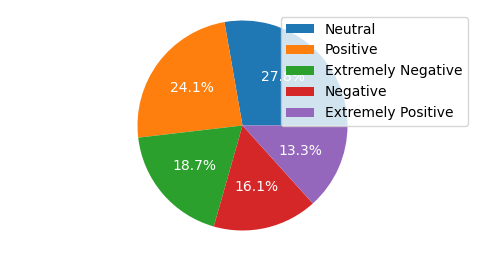

In [ ]:
plt.figure(figsize=(6,3))
plt.pie(train_data['Sentiment'].value_counts(), labels=train_data['Sentiment'].unique(), autopct='%.1f%%', textprops={'color':"w"})
plt.legend(loc='upper right')
plt.axis('equal')
plt.show()

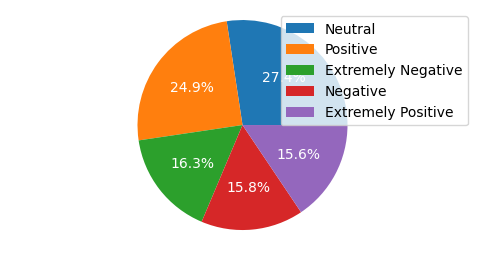

In [ ]:
plt.figure(figsize=(6,3))
plt.pie(test_data['Sentiment'].value_counts(), labels=train_data['Sentiment'].unique(), autopct='%.1f%%', textprops={'color':"w"})
plt.legend(loc='upper right')
plt.axis('equal')
plt.show()

Data preprocessing

In [ ]:
train_df= train_data[['OriginalTweet','Sentiment']]
test_df= test_data[['OriginalTweet','Sentiment']]

train_df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
test_df.head()

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive
2,Find out how you can protect yourself and love...,Extremely Positive
3,#Panic buying hits #NewYork City as anxious sh...,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [ ]:
train_df['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [ ]:
test_df['Sentiment'].value_counts()

Negative              1041
Positive               947
Neutral                619
Extremely Positive     599
Extremely Negative     592
Name: Sentiment, dtype: int64

In [ ]:
label_map = {"Extremely Negative": 0, "Negative": 1, "Neutral": 2, "Positive": 3, "Extremely Positive": 4}
train_df["Rating"] = train_df["Sentiment"].map(label_map)
train_df.head(10)

<ipython-input-20-319c73a3af75>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["Rating"] = train_df["Sentiment"].map(label_map)


,OriginalTweet,Sentiment,Rating
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,2
1,advice Talk to your neighbours family to excha...,Positive,3
2,Coronavirus Australia: Woolworths to give elde...,Positive,3
3,My food stock is not the only one which is emp...,Positive,3
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,0
5,As news of the regionÂs first confirmed COVID...,Positive,3
6,Cashier at grocery store was sharing his insig...,Positive,3
7,Was at the supermarket today. Didn't buy toile...,Neutral,2
8,Due to COVID-19 our retail store and classroom...,Positive,3
9,"For corona prevention,we should stop to buy th...",Negative,1


In [ ]:
test_df.head(10)

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive
2,Find out how you can protect yourself and love...,Extremely Positive
3,#Panic buying hits #NewYork City as anxious sh...,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
5,Do you remember the last time you paid $2.99 a...,Neutral
6,Voting in the age of #coronavirus = hand sanit...,Positive
7,"@DrTedros ""We canÂt stop #COVID19 without pro...",Neutral
8,HI TWITTER! I am a pharmacist. I sell hand san...,Extremely Negative
9,Anyone been in a supermarket over the last few...,Extremely Positive


In [ ]:
test_df["Rating"] = test_df["Sentiment"].map(label_map)
test_df.head()

<ipython-input-22-b232ee03496b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["Rating"] = test_df["Sentiment"].map(label_map)


,OriginalTweet,Sentiment,Rating
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,0
1,When I couldn't find hand sanitizer at Fred Me...,Positive,3
2,Find out how you can protect yourself and love...,Extremely Positive,4
3,#Panic buying hits #NewYork City as anxious sh...,Negative,1
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,2


In [ ]:
X=train_df['OriginalTweet'].copy()
y=train_df['Rating'].copy()

In [ ]:
X_test=test_df['OriginalTweet'].copy()
y_test=test_df['Rating'].copy()

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

lemma = nltk.WordNetLemmatizer()

def data_cleaner(tweet):
    tweet = re.sub(r'http\S+', ' ', tweet)
    tweet = re.sub('\[.*?\]', ' ', tweet)
    tweet = re.sub(r'<.*?>', ' ', tweet)
    tweet = re.sub(r'\d+', ' ', tweet)
    tweet = re.sub(r'#\w+', ' ', tweet)
    tweet = re.sub(r'@\w+', ' ', tweet)
    tweet = re.sub('[^a-zA-Z]', ' ', tweet)
    tweet = tweet.lower()
    tweet = word_tokenize(tweet)
    tweet = [word for word in tweet if word not in set(stopwords.words('english'))]
    tweet = [lemma.lemmatize(word) for word in tweet]
    tweet = ' '.join(tweet)
    return tweet


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
X_cleaned=X.apply(data_cleaner)
X_cleaned.head(10)

0                                                     
1    advice talk neighbour family exchange phone nu...
2    coronavirus australia woolworth give elderly d...
3    food stock one empty please panic enough food ...
4    ready go supermarket outbreak paranoid food st...
5    news region first confirmed covid case came su...
6    cashier grocery store sharing insight prove cr...
7                   supermarket today buy toilet paper
8    due covid retail store classroom atlanta open ...
9    corona prevention stop buy thing cash use onli...
Name: OriginalTweet, dtype: object

In [ ]:
X_test_cleaned=X_test.apply(data_cleaner)
X_test_cleaned.head(10)

0    trending new yorkers encounter empty supermark...
1    find hand sanitizer fred meyer turned pack pur...
2                               find protect loved one
3    buying hit city anxious shopper stock food amp...
4    news newsmelb one week everyone buying baby mi...
5    remember last time paid gallon regular gas los...
6                            voting age hand sanitizer
7    stop without protecting price surgical mask in...
8    hi twitter pharmacist sell hand sanitizer livi...
9    anyone supermarket last day went normal shop l...
Name: OriginalTweet, dtype: object

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X_cleaned)
X=tokenizer.texts_to_sequences(X_cleaned)
vocab_size=len(tokenizer.word_index)+1
print(f'Word Size : {vocab_size}')
print('\nSample:\n')
print(f'Original Sentence :\n{X_cleaned[10]}')
print(f'\nAfter Tokenization :\n{X[10]}')
X=pad_sequences(X,padding='post')
print(f'\nAfter Padding :\n{X[10]}')

Word Size : 28932

Sample:

Original Sentence :
month crowding supermarket restaurant however reducing hour closing mall mean everyone using entrance dependent single supermarket

After Tokenization :
[139, 3341, 4, 187, 719, 1429, 108, 477, 943, 210, 71, 236, 2036, 4096, 648, 4]

After Padding :
[ 139 3341    4  187  719 1429  108  477  943  210   71  236 2036 4096
  648    4    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0]


In [ ]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X_test_cleaned)
X_test=tokenizer.texts_to_sequences(X_test_cleaned)
vocab_size_test=len(tokenizer.word_index)+1
print(f'Word Size : {vocab_size_test}')
print('\nSample:\n')
print(f'Original Sentence :\n{X_test_cleaned[10]}')
print(f'\nAfter Tokenization :\n{X_test[10]}')
X_test=pad_sequences(X_test,padding='post')
print(f'\nAfter Padding :\n{X_test[10]}')

Word Size : 8168

Sample:

Original Sentence :
best quality couch unbelievably low price available order boksburg gp info whatsapp

After Tokenization :
[207, 1191, 2927, 4127, 155, 12, 184, 142, 4128, 2928, 548, 1657]

After Padding :
[ 207 1191 2927 4127  155   12  184  142 4128 2928  548 1657    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0]


In [ ]:
import numpy as np

In [ ]:
data_frame=pd.DataFrame({
    'Tweets':X_cleaned,
    'Sentiment':y
})


In [ ]:
data_frame.head()

,Tweets,Sentiment
0,,2
1,advice talk neighbour family exchange phone nu...,3
2,coronavirus australia woolworth give elderly d...,3
3,food stock one empty please panic enough food ...,3
4,ready go supermarket outbreak paranoid food st...,0


In [ ]:

data_frame_test =pd.DataFrame({
    'Tweets':X_test_cleaned,
    'Sentiment':y_test
})


Model training and evaluation

Tf-idf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
xtrain_tfidf = tfidf_vect.fit_transform(data_frame['Tweets'])
xtest_tfidf = tfidf_vect.transform(data_frame_test['Tweets'])
print(xtrain_tfidf.shape,xtest_tfidf.shape)


(41157, 28907) (3798, 28907)


Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=500,multi_class='multinomial')
clf.fit(xtrain_tfidf,y)
pred = clf.predict(xtest_tfidf)
score = clf.score(xtest_tfidf,y_test)
score

0.5666140073723012

Confusion matrix

Text(0.5, 14.722222222222216, 'Predicted')

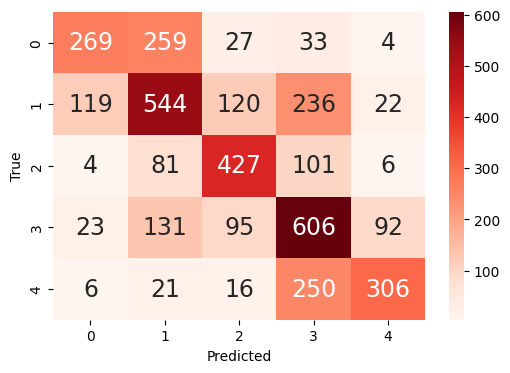

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d',annot_kws={'size':17}, cmap='Reds')
plt.ylabel('True')
plt.xlabel('Predicted')